# Day 08. Exercise 03
# Overfitting

## 0. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## 1. Preprocessing

1. Read the file `dayofweek.csv` to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`.
3. Using, for example, `value_counts()` to check if the distribution of classes is similar in train and test.
4. Use the additional parameter `stratify=` and check the distribution again, now it should be more or less similar in both datasets.

In [2]:
df = pd.read_csv('../data/dayofweek.csv')
df

,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,uid_user_18,...,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,numTrials,hour,dayofweek
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.788667,-2.562352,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.756764,-2.562352,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.724861,-2.562352,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.692958,-2.562352,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.661055,-2.562352,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.533442,0.945382,3
1682,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.629151,0.945382,3
1683,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.597248,0.945382,3
1684,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.565345,0.945382,3


In [3]:
X = df.drop(columns=['dayofweek'])
y = df['dayofweek']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.2)

In [5]:
y_train.value_counts()

dayofweek
3    313
6    287
1    222
5    216
2    125
0    105
4     80
Name: count, dtype: int64

In [6]:
y_test.value_counts()

dayofweek
3    83
6    69
5    55
1    52
0    31
4    24
2    24
Name: count, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.2, stratify=y)

In [8]:
y_train.value_counts()

dayofweek
3    316
6    285
1    219
5    217
2    119
0    109
4     83
Name: count, dtype: int64

In [9]:
y_test.value_counts()

dayofweek
3    80
6    71
1    55
5    54
2    30
0    27
4    21
Name: count, dtype: int64

## 2. Baseline models

1. Train exactly the same baseline models from the previous exercise and calculate the accuracies using the test dataset with stratification.
2. Did all the models show the similar values of the metric? Which one has the largest difference comparing the current exercise and the previous? Put the answer to the markdown cell in the end of the section.

### a. Logreg

In [10]:
regr = LogisticRegression(random_state=21, fit_intercept=False, solver='liblinear')
regr.fit(X_train, y_train)
pred = regr.predict(X_test)

c:\Users\vtsab\DSB10_Intro_to_ML.ID_886521-1\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


In [11]:
accuracy_score(y_test, pred)

0.5769230769230769

### b. SVM

In [12]:
svc = SVC(random_state=21, probability=True, kernel='linear')
svc.fit(X_train, y_train)
pred = svc.predict(X_test)

In [13]:
accuracy_score(y_test, pred)

0.7071005917159763

### c. Decision tree

In [14]:
dtree = DecisionTreeClassifier(random_state=21, max_depth=4)
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)

In [15]:
accuracy_score(y_test, pred)

0.5295857988165681

### d. Random forest

In [16]:
rfor = RandomForestClassifier(random_state=21, max_depth=25, n_estimators=100)
rfor.fit(X_train, y_train)
pred = rfor.predict(X_test)

In [17]:
accuracy_score(y_test, pred)

0.9378698224852071

Random forest has 0.07 difference. Definitely overfitted previously.

## 3. Crossvalidation

We could play with parameters of the model trying to achive a better accuracy on the test dataset, but it is a bad practice. It leads us again to overfitting. Test dataset is only for checking quality of a final model.

But there is another way of solving the problem – crossvalidation. It does not use test dataset, but creates one more split of train dataset. Again, there are different ways of doing it, but the common thing is that there is a validation dataset that is used for hyperparameters optimization.

1. Using `cross_val_score` with `cv=10` calculate the mean accuracy and standard deviation for every model that you used before (logreg with `solver='liblinear'`, SVC, decision tree, random forest).

### a. Logreg

In [18]:
scores = cross_val_score(regr, X, y, cv=10, scoring='accuracy')

c:\Users\vtsab\DSB10_Intro_to_ML.ID_886521-1\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\vtsab\DSB10_Intro_to_ML.ID_886521-1\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\vtsab\DSB10_Intro_to_ML.ID_886521-1\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An e

In [19]:
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())

Mean accuracy: 0.42210129613975766
Standard deviation of accuracy: 0.1690565527135729


### b. SVM

In [20]:
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')

In [21]:
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())

Mean accuracy: 0.5057868413637645
Standard deviation of accuracy: 0.14871599533216864


### c. Decision tree

In [22]:
scores = cross_val_score(dtree, X, y, cv=10, scoring='accuracy')

In [23]:
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())

Mean accuracy: 0.3883523527754297
Standard deviation of accuracy: 0.11835394295385691


### d. Random forest

In [24]:
scores = cross_val_score(rfor, X, y, cv=10, scoring='accuracy')

In [25]:
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())

Mean accuracy: 0.6601859678782754
Standard deviation of accuracy: 0.16965550291752365


## 4. Optimization

1. Choose the best model and play a little bit with the parameters on cross-validation, find a good enough parameter or a combination of the parameters.
2. Calculate the accuracy for the final model on the test dataset.
3. Draw a plot that displays the top-10 most  important features for that model.
4. Save the model using `joblib`.
5. Load the model, make predictions for the test dataset and calculate the accuracy.

In [26]:
def get_feature_importance(model):
    '''
    Получаем важность коэффициентов для разных моделей
    '''
    if hasattr(model, 'coef_'):
        coef = model.coef_
        # Если это матрица
        if isinstance(coef, np.ndarray) and coef.ndim > 1:
            importance = np.abs(coef).sum(axis=0)
        else:
            importance = np.abs(coef)
        return importance
    elif hasattr(model, 'feature_importances_'):
        return model.feature_importances_
    elif hasattr(model, 'estimators_'):
        # Собираем важности
        importance_list = []
        for est in model.estimators_:
            if hasattr(est, 'coef_'):
                # Если есть coef_, суммируем по классам
                coef = est.coef_
                importance_list.append(np.abs(coef).sum(axis=0))
            elif hasattr(est, 'feature_importances_'):
                importance_list.append(est.feature_importances_)
        # Складываем важности
        return np.array(importance_list).sum(axis=0)
    else:
        raise ValueError('Не удалось получить коэффициенты модели')

def plot_top_features(model, feature_names, top_n=10):
    importance = get_feature_importance(model)
    feature_importance = pd.Series(importance, index=feature_names)
    top_features = feature_importance.nlargest(top_n)

    plt.figure(figsize=(8, 6))
    top_features.plot(kind='barh')
    plt.xlabel('Importance')
    plt.title(f'Top {top_n} Features')
    plt.gca().invert_yaxis()
    plt.show()

RandomForest was the best, so let's play with it

1. Base Balanced

In [27]:
rfor1 = RandomForestClassifier(
    random_state=21,
    n_estimators=200,        # Увеличено количество деревьев
    max_depth=15,            # Уменьшена глубина для борьбы с переобучением
    min_samples_split=10,    # Минимальное количество samples для разделения узла
    min_samples_leaf=4,      # Минимальное количество samples в листе
    max_features='sqrt'      # Количество фичей для рассмотрения при разделении
)
rfor1.fit(X_train, y_train)
pred = rfor1.predict(X_test)

In [28]:
scores = cross_val_score(rfor1, X, y, cv=10, scoring='accuracy')

In [29]:
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())

Mean accuracy: 0.6110066215835446
Standard deviation of accuracy: 0.1830916307897008


2. Balanced to prevent overfitting

In [30]:
rfor2 = RandomForestClassifier(
    random_state=21,
    n_estimators=150,
    max_depth=10,            # Сильное ограничение глубины
    min_samples_split=20,    # Более строгие требования для разделения
    min_samples_leaf=10,     # Больше samples в терминальных узлах
    max_samples=0.7,         # Использует только 70% данных для каждого дерева
    bootstrap=True           # Включение бутстрап выборки
)
rfor2.fit(X_train, y_train)
pred = rfor2.predict(X_test)

In [31]:
scores = cross_val_score(rfor2, X, y, cv=10, scoring='accuracy')

In [32]:
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())

Mean accuracy: 0.47745843899690044
Standard deviation of accuracy: 0.14720407317601888


3. Balanced for maximized perfomance

In [33]:
rfor3 = RandomForestClassifier(
    random_state=21,
    n_estimators=500,        # Большое количество деревьев
    max_depth=None,          # Без ограничения глубины
    min_samples_split=2,     # Минимальные ограничения
    min_samples_leaf=1,
    max_features='log2',     # log2(n_features) для разделения
    criterion='entropy'      # Альтернативный критерий для разделения
)
rfor3.fit(X_train, y_train)
pred = rfor3.predict(X_test)

In [34]:
scores = cross_val_score(rfor3, X, y, cv=10, scoring='accuracy')

In [35]:
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())

Mean accuracy: 0.6667089320935474
Standard deviation of accuracy: 0.172302055333496


4. Balanced for Big Data

In [36]:
rfor4 = RandomForestClassifier(
    random_state=21,
    n_estimators=50,         # Меньше деревьев для скорости
    max_depth=8,             # Ограниченная глубина
    min_samples_split=50,    # Крупные узлы для скорости
    max_features=0.3,        # Меньше фичей для рассмотрения
    n_jobs=-1,               # Использование всех ядер процессора
    warm_start=False         # Не использовать предыдущую подгонку
)
rfor4.fit(X_train, y_train)
pred = rfor4.predict(X_test)

In [37]:
scores = cross_val_score(rfor4, X, y, cv=10, scoring='accuracy')

In [38]:
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())

Mean accuracy: 0.4684770357847281
Standard deviation of accuracy: 0.1440584540344384


4. Balanced for Big Data

In [39]:
rfor5 = RandomForestClassifier(
    random_state=21,
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features=0.5,        # 50% фичей для каждого разделения
    ccp_alpha=0.01,          # Параметр минимальной cost-complexity pruning
    oob_score=True           # Включение out-of-bag оценки
)
rfor5.fit(X_train, y_train)
pred = rfor5.predict(X_test)

In [40]:
scores = cross_val_score(rfor5, X, y, cv=10, scoring='accuracy')

In [41]:
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())

Mean accuracy: 0.4815828402366863
Standard deviation of accuracy: 0.18237228354226606


### Features

Third one (maximized perfomance) was the best, lets look at the features

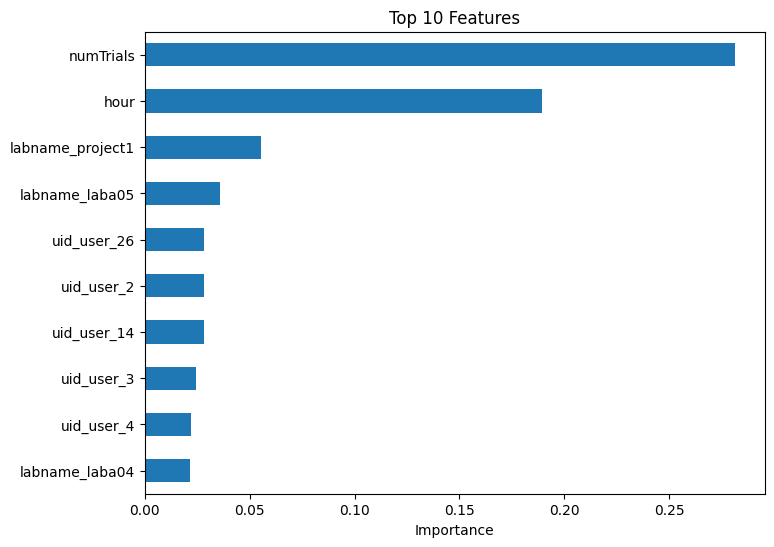

In [42]:
plot_top_features(rfor, X.columns)

### Save and load


In [43]:
joblib.dump(rfor3, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [44]:
loaded_model = joblib.load('random_forest_model.pkl')
predictions = loaded_model.predict(X_test)
accuracy_score(y_test, pred)

0.6538461538461539